In [26]:
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [2]:
def plotAdvOri(original,adversarial):

    plt.figure()

    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(original)  # division by 255 to convert [0, 255] to [0, 1]
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Adversarial')
    plt.imshow(adversarial )  # ::-1 to convert BGR to RGB
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Difference')
    difference = adversarial- original
    plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
    plt.axis('off')

    plt.show()

#plotAdvOri(image/255,adversarial[:, :, ::-1]/255)

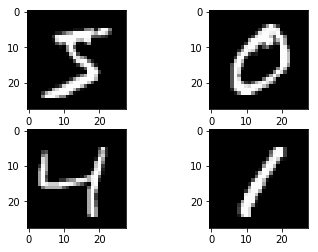

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_trainF = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_testF = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_trainF = X_trainF / 255
X_testF = X_testF / 255

In [8]:
# one hot encode outputs
y_trainF = np_utils.to_categorical(y_train)
y_testF = np_utils.to_categorical(y_test)
num_classes = y_testF.shape[1]

In [9]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
print(X_train[0].shape)

(28, 28)


In [11]:
model = baseline_model()
# Fit the model
model.fit(X_trainF, y_trainF, validation_data=(X_testF, y_testF), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_testF, y_testF, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2792 - acc: 0.9208 - val_loss: 0.1417 - val_acc: 0.9571
Epoch 2/10
 - 3s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0919 - val_acc: 0.9712
Epoch 3/10
 - 3s - loss: 0.0718 - acc: 0.9795 - val_loss: 0.0779 - val_acc: 0.9773
Epoch 4/10
 - 3s - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0741 - val_acc: 0.9774
Epoch 5/10
 - 3s - loss: 0.0371 - acc: 0.9894 - val_loss: 0.0680 - val_acc: 0.9792
Epoch 6/10
 - 3s - loss: 0.0268 - acc: 0.9926 - val_loss: 0.0630 - val_acc: 0.9802
Epoch 7/10
 - 3s - loss: 0.0211 - acc: 0.9945 - val_loss: 0.0614 - val_acc: 0.9820
Epoch 8/10
 - 3s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0615 - val_acc: 0.9806
Epoch 9/10
 - 3s - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0609 - val_acc: 0.9807
Epoch 10/10
 - 3s - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0593 - val_acc: 0.9819
Baseline Error: 1.81%


In [12]:
model.save('my_model.h5')
#model = load_model('my_model.h5')

In [13]:
df= pd.DataFrame(y_trainF)
df.head(12)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_testF.shape


(10000, 784)

In [15]:
#_,(images, labels) = mnist.load_data()
images = X_test.reshape(10000,28,28,1)
images= images.astype('float32')
images /= 255
labels=y_test

(28, 28)


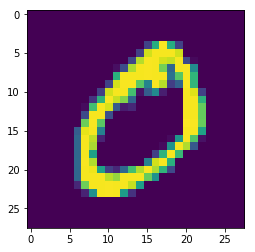

In [16]:
print(X_train[1].shape)
plt.imshow(X_trainF[0].reshape(28,28))
plt.imshow(X_trainF[1].reshape(28,28))
plt.show()

In [17]:
print(images[1].shape)
print(y_train[1])
gmodel = foolbox.models.KerasModel(model, bounds=(0, 1))


(28, 28, 1)
0


In [18]:
attackM = foolbox.attacks.FGSM(gmodel)
adversarialM = attackM(images[0].reshape(784), labels[0])

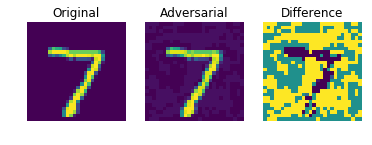

In [19]:
plotAdvOri(images[0].reshape(28,28),adversarialM.reshape(28,28))

In [20]:
adversarialMM =adversarialM.reshape(1,784)


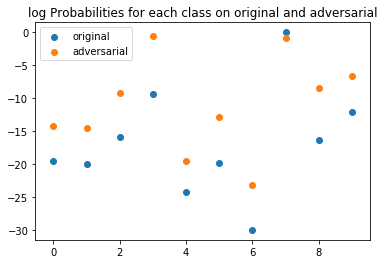

In [21]:
 #reshaping it for model prediction
model_predictions_original = model.predict(images[0].reshape(1,784))
model_predictions_adversarial = model.predict(adversarialMM)
#print(model_predictions_adversarial)

plt.scatter(np.arange(10), np.log(model_predictions_original), label="original")
plt.scatter(np.arange(10), np.log(model_predictions_adversarial), label="adversarial")
plt.legend()
plt.title("log Probabilities for each class on original and adversarial")
plt.show()

On voit ici que pour l'original la prediction était 7 qui correspondait bien à l'image. La deuxième plus forte probabilité pour l'original est 3. Le FGSM a donc permis d'augmenter cette deuxième probabilité pour qu'elle surpasse (tout juste) la probabilité que l'adversarial soit un 7.

In [22]:
model_prediction_class = model.predict_classes(adversarialMM)
print("from {} to {}".format(str(labels[0]),str(model_prediction_class)))

from 7 to [3]


In [23]:
diff=images[0].reshape(784)-adversarialM
dist = np.linalg.norm(diff)
print("Compare original image and adversarial L2: {} L0: {}".format(np.linalg.norm(diff), np.linalg.norm(diff, ord=0)))

Compare original image and adversarial L2: 0.87375408411026 L0: 468.0


In [24]:
dist2 = np.linalg.norm(images[0].reshape(784)-images[1].reshape(784))
diff2=images[0].reshape(784)-images[1].reshape(784)
#print(dist2)
print("Compare image 0 (7) and 1 (2) L2: {} L0: {}".format(np.linalg.norm(diff2), np.linalg.norm(diff2, ord=0)))

Compare image 0 (7) and 1 (2) L2: 11.268815994262695 L0: 243.0


On voit ici que pour le fgsm L2 est plus judicieux par rapport à L0

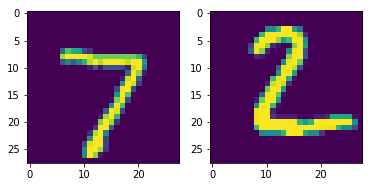

In [25]:
plt.subplot(121)
plt.imshow(images[0].reshape(28,28))
plt.subplot(122)
plt.imshow(images[1].reshape(28,28))